# Shor's Algorithm

Shor’s algorithm is famous for factoring integers in polynomial time. Since the best-known classical algorithm requires greater-than-polynomial time to factor the product of two primes, the widely used cryptographic protocol, RSA, relies on factoring being impossible for large enough integers.

In this chapter we will focus on the quantum part of Shor’s algorithm, which actually solves the problem of period finding. Since a factoring problem can be turned into a period finding problem in polynomial time, an efficient period finding algorithm can be used to factor integers efficiently too. For now its enough to show that if we can compute the period of 
 efficiently, then we can also efficiently factor. Since period finding is a worthy problem in its own right, we will first solve this, then discuss how this can be used to factor.

## Background
Usage estimate: 4 seconds on ibm_nairobi(NOTE; This is an estimate only. Your runtime may
vary)

In order to run Shor's algorithm one of the applications of Quantum Fourier transform, requires an oracle that implements the function $f(x) = a^x \mod N$ for a given $a$ and $N$. This oracle can be implemented using the modular exponentiation function. Here, we demonstrate how to construct the oracle and run Shor's algorithm on a quantum computer.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [13]:
#Built-in modules
import math

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit.circuit.library import QFT
import numpy as np
import matplotlib.pyplot as plt

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [76]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
# backend = service.least_busy(operational=True, simulator=False)
backend=AerSimulator()
backend.name

'aer_simulator'

In [15]:
pm=generate_preset_pass_manager(backend=backend,optimization_level=3)

In [318]:
N=3**5*2**8
a=np.random.randint(1,N)

In [319]:
# Check if a is coprime with N
while math.gcd(a,N)!=1:
    a=np.random.randint(1,N)

print(f"Chosen a={a} such that it is coprime with N={N}")

Chosen a=48257 such that it is coprime with N=62208


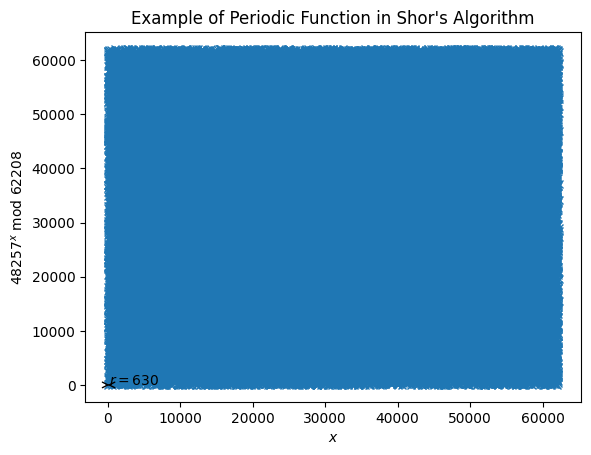

In [320]:
# Calculate the plotting data
xvals = np.arange(N)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

## Step 1: Map classical inputs to a quantum problem

The Shor's algorithm first checks if $N$ is even or a prime number. If it is even, then it returns the factor of $N/2$ and $2$.

In [321]:
# Check if N=a^b for some a and b
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

In [322]:
def Shor(N):
    # Check if $N$ is even
    factors={}
    while N%2==0:
        if 2 not in factors:
            factors[2]=0
        factors[2]+=1
        N=N//2
               

    if N!=1:
        log2n=math.log2(N)

        for b in range(2,math.floor(log2n)+1):
            x=log2n/b
            
            u_1=math.floor(2**x)
            u_2=math.ceil(2**x)

            if u_1**b==N:
                factors[u_1]=b
                break
            elif u_2**b==N:
                factors[u_2]=b
                break
            else:
                continue
    
            


        
    
    return factors



In [323]:
factors = Shor(N)

In [324]:
print(factors)

{2: 8, 3: 5}
